In [152]:
import json
import requests
import pandas
import matplotlib.pyplot as plt

In [153]:
# https://query1.finance.yahoo.com/v11/finance/quoteSummary/{symbol}
header = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'
 }
url = 'https://query1.finance.yahoo.com/v10/finance/quoteSummary/'
url2 = 'https://query1.finance.yahoo.com/v7/finance/quote'

In [161]:
stock = input()

GOOG


In [162]:
query = {'symbol':stock,'modules':'financialData'}
query2 = {'symbols':stock}

In [163]:
response2 = requests.request("GET",url2,headers = header, params = query2)
json_resp2 = response2.json()

In [164]:
response = requests.request("GET",url,headers = header, params = query)
json_resp = response.json()

In [165]:
try:
    symb = json_resp2['quoteResponse']['result'][0]['symbol']
except (IndexError):
    print('Invalid Ticker. Try Again.')

In [166]:
name = json_resp2['quoteResponse']['result'][0]['longName']
curPrice = json_resp['quoteSummary']['result'][0]['financialData']['currentPrice']['fmt']
tmp = json_resp['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['fmt']
cash = json_resp['quoteSummary']['result'][0]['financialData']['totalCash']['fmt']
profMarg = json_resp['quoteSummary']['result'][0]['financialData']['profitMargins']['fmt']
date = str(pandas.Timestamp(json_resp2['quoteResponse']['result'][0]['regularMarketTime']))

In [167]:
print('Name Ticker:',symb +',','Full Name:',name+',','Current Price:',curPrice+',','Target Mean Price:',tmp+',','Cash on Hand:',cash+',','Profit Margins:',profMarg)

Name Ticker: GOOG, Full Name: Alphabet Inc., Current Price: 97.18, Target Mean Price: 148.95, Cash on Hand: 125B, Profit Margins: 25.89%


In [168]:
dict = {'date':date,'symb':symb,'name':name,'current_price':curPrice,'target_mean_price':tmp,'cash_on_hand':cash,'profit_margins':profMarg}
results_json = json.dumps(dict)

In [169]:
url3 = 'https://query1.finance.yahoo.com/v8/finance/chart/'
query3 = {'symbol':stock,'interval':'1d','range':'5d'}
response3 = requests.request("GET",url3,headers = header, params = query3)
json_resp3 = response3.json()

In [170]:
highPrice = json_resp3['chart']['result'][0]['indicators']['quote'][0]['high']
days = [1, 2, 3, 4, 5]

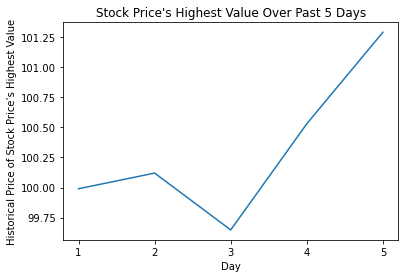

In [171]:
plt.plot(days,highPrice)
plt.xlabel('Day')
plt.ylabel('Historical Price of Stock Price’s Highest Value')
plt.title('Stock Price\'s Highest Value Over Past 5 Days')
plt.xticks([1,2,3,4,5])
plt.show()